# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   Dataset yang digunakan adalah [Loan Eligibility Prediction Dataset](https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction) yang diambil dari Kaggle dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [102]:
csv_data = 'LoanEligibilityDataset_preprocessing\dataset.csv'
df = pd.read_csv(csv_data)
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


# **4. Exploratory Data Analysis (EDA)**

Variabel pada dataset:
- `Customer_ID`, nomor unik dari masing-masing peminjam
- `Gender`, jenis kelamin peminjam
- `Married`, status perkawinan
- `Dependents`, jumlah tanggungan
- `Education`, tingkat pendidikan peminjam
- `Self-Employed`, pekerjaan peminjam mandiri/tidak
- `Applicant_Income`, pendapatan perbulan bersama pemohon
- `Coapplicant_Income`, pendapatan perbulan pemohon bersama
- `Loan_Amount`, jumlah pinjaman yang dipinta (dalam ribu dollar)
- `Loan_Amount_Term`, jangka waktu pengembalian pinjaman (dalam bulan)
- `Credit_History`, riwayat kredit memenuhi kriteria pinjaman (1=Ya, 0=Tidak)
- `Property_Area`, jenis wilayah properti (Urban/Semiurban/Rural)
- `Loan_Status`, pinjaman disetujui atau tidak (variabel target)

In [103]:
# Mencari nilai yang kosong
print("Data yang kosong: ",df.isna().sum().sum())
print("Data duplicate: ", df.duplicated().sum())
print("Ukuran dataset: ", df.shape)

Data yang kosong:  0
Data duplicate:  0
Ukuran dataset:  (614, 13)


### Visualisasi Data Kategori

In [104]:
num_col = df.select_dtypes(include='number')
cat_col = df.select_dtypes(include='object')

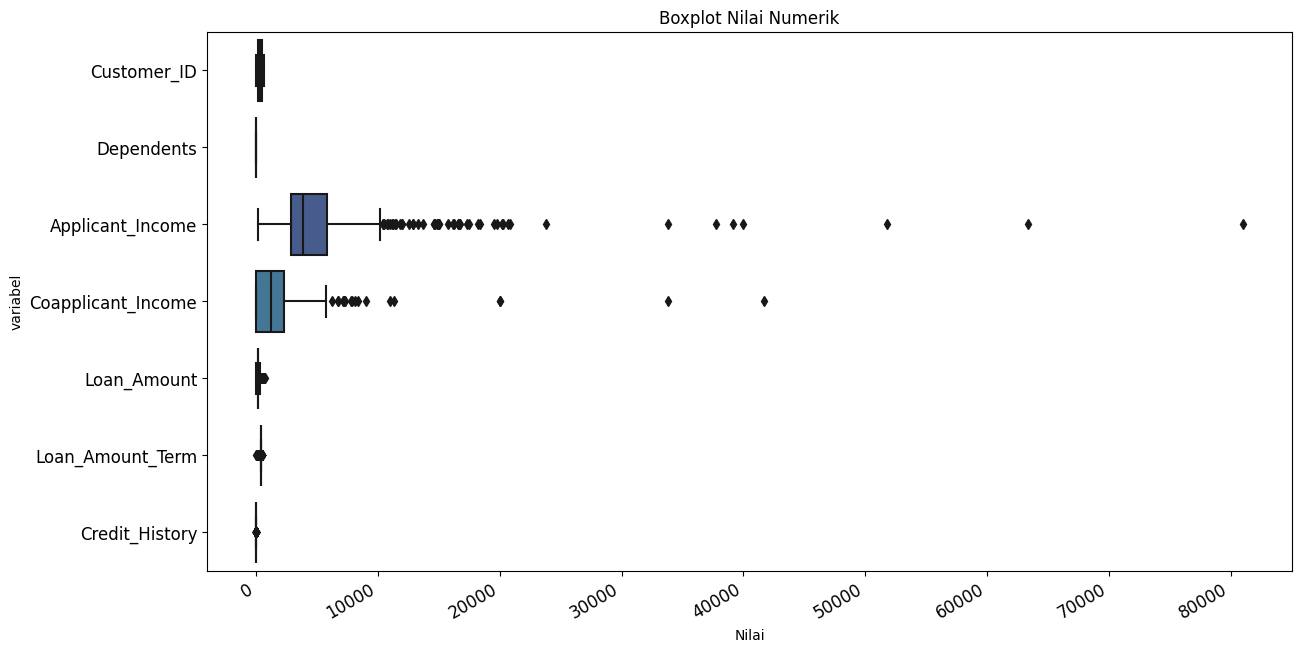

In [105]:
# Mengecek nilai outlier
df_long = df.melt(
    value_vars=num_col,     # kolom numerik yang dilebur
    var_name='variabel',    # nama kolom baru
    value_name='Nilai'      # nama kolom nilai
)

plt.figure(figsize=(14,7))
sns.boxplot(data=df_long, x='Nilai', y='variabel', palette='mako')

plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplot Nilai Numerik")
plt.show()


### Visualisasi Data Kategori

In [106]:
feature_names = []
unique_values_list = []

for col in cat_col:
    unique_values = df[col].unique()
    unique_values_list.append(unique_values)
    feature_names.append(col)

df_category_unique = pd.DataFrame({'Feature': feature_names, 'Unique Values': unique_values_list})
df_category_unique

,Feature,Unique Values
0,Gender,"[Female, Male]"
1,Married,"[No, Yes]"
2,Education,"[Graduate, Not Graduate]"
3,Self_Employed,"[No, Yes]"
4,Property_Area,"[Urban, Semiurban, Rural]"
5,Loan_Status,"[N, Y]"



Distribusi fitur: Gender
        Jumlah Sampel    Percent
Gender                          
Male              499  81.270358
Female            115  18.729642


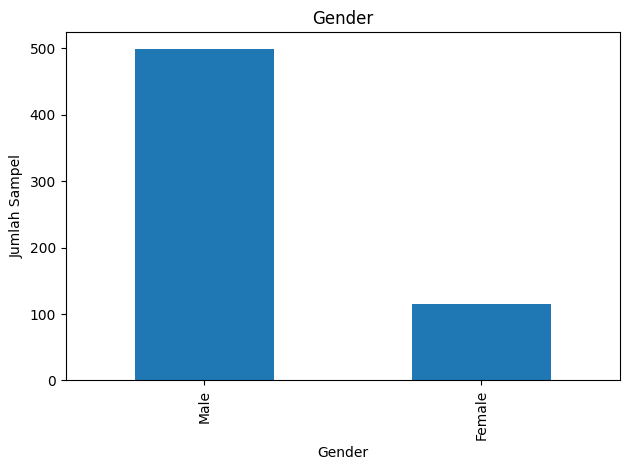


Distribusi fitur: Married
         Jumlah Sampel    Percent
Married                          
Yes                399  64.983713
No                 215  35.016287


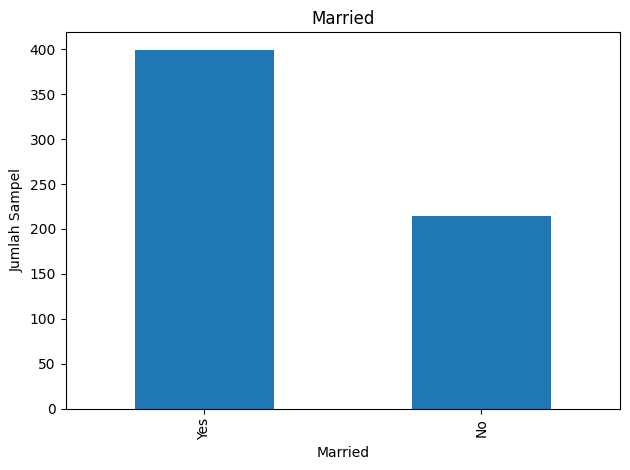


Distribusi fitur: Education
              Jumlah Sampel    Percent
Education                             
Graduate                480  78.175896
Not Graduate            134  21.824104


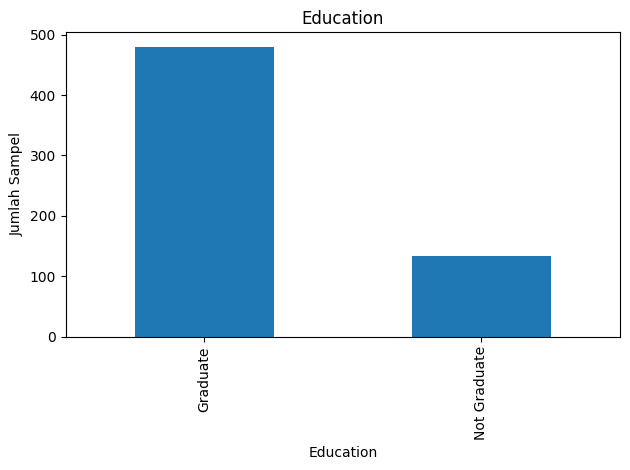


Distribusi fitur: Self_Employed
               Jumlah Sampel    Percent
Self_Employed                          
No                       523  85.179153
Yes                       91  14.820847


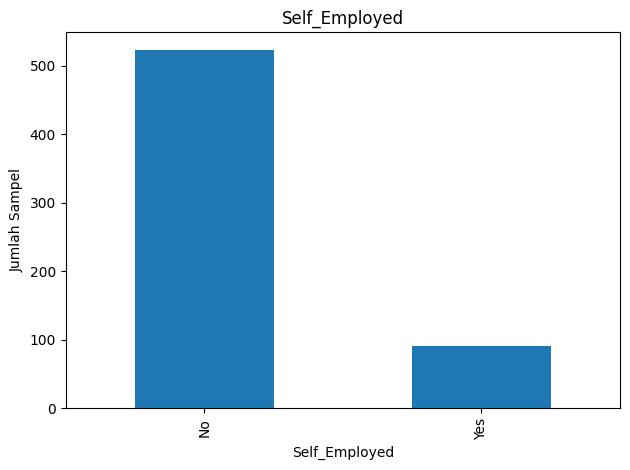


Distribusi fitur: Property_Area
               Jumlah Sampel    Percent
Property_Area                          
Semiurban                233  37.947883
Urban                    202  32.899023
Rural                    179  29.153094


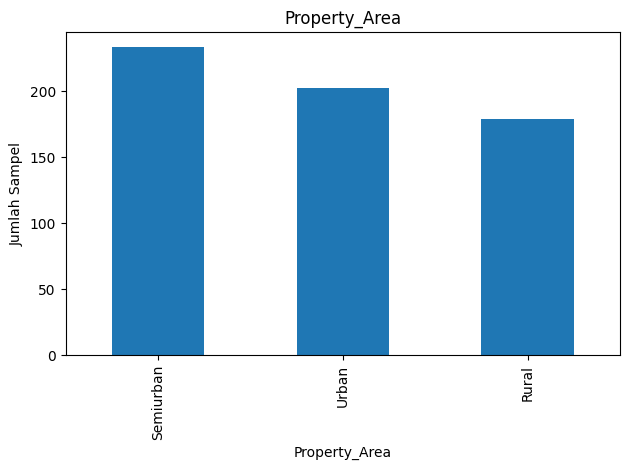


Distribusi fitur: Loan_Status
             Jumlah Sampel    Percent
Loan_Status                          
Y                      422  68.729642
N                      192  31.270358


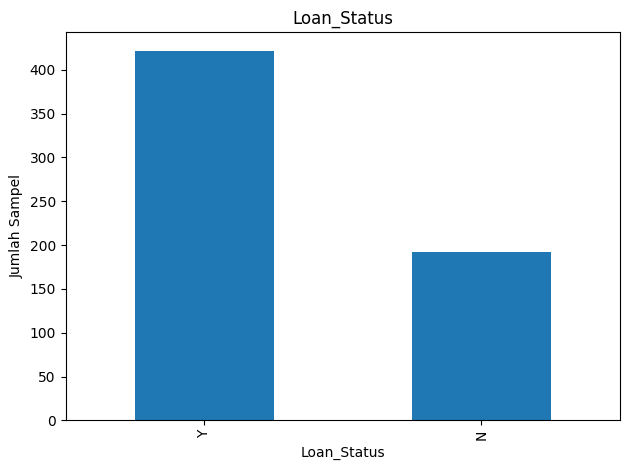

In [107]:
for col in cat_col:
    count = df[col].value_counts()
    percent = 100 * df[col].value_counts(normalize=True)
    data = pd.DataFrame({'Jumlah Sampel': count, 'Percent': percent})

    print(f'\nDistribusi fitur: {col}')
    print(data)

    count.plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Jumlah Sampel')
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Fitur Customer_ID, Education, Property_Area, dan Gender tidak akan digunakan

In [108]:
cat = ['Customer_ID', 'Education', 'Property_Area', 'Gender']

df = df.drop(cat, axis=1)

In [109]:
# Menangani outlier
num_col = df.select_dtypes('number').columns

def handling_outlier(df, num_col):
    # buat mask default -> semua True
    mask = pd.Series(True, index=df.index)

    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        col_mask = ~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
        mask = mask & col_mask   # gabungkan

    df = df[mask].reset_index(drop=True)
    
    return df

df = handling_outlier(df, num_col)

df

,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,2378,0.0,9,360,1,N
1,Yes,1,No,5468,1032.0,26,360,1,Y
2,Yes,1,No,1538,1425.0,30,360,1,Y
3,No,0,No,3237,0.0,30,360,1,Y
4,No,0,No,1442,0.0,35,360,1,N
...,...,...,...,...,...,...,...,...,...
384,Yes,2,No,3601,1590.0,15,360,1,Y
385,Yes,0,No,2213,1125.0,20,360,1,Y
386,Yes,2,No,2947,1603.0,10,360,1,N
387,No,0,No,4680,2087.0,15,360,1,N


In [110]:
target = 'Loan_Status'
X = df.drop(target, axis=1)
y = df[target]

In [111]:
# Pemisahan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape

(311, 8)

In [112]:
# Normalisasi data numerik menggunakan z-normalization

scaler = StandardScaler().set_output(transform='pandas')
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

X_test

,Married,Dependents,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
271,No,-0.516160,No,-0.011269,1.411775,0.722849,0.0,0.0
46,No,-0.516160,No,-0.253665,-0.842266,-0.702770,0.0,0.0
167,No,-0.516160,No,0.035741,-0.842266,0.100396,0.0,0.0
42,Yes,3.721782,No,-0.462762,-0.842266,-0.823244,0.0,0.0
350,Yes,0.543326,No,1.350066,-0.842266,1.706726,0.0,0.0
...,...,...,...,...,...,...,...,...
3,No,-0.516160,No,-0.431422,-0.842266,-1.706726,0.0,0.0
18,Yes,-0.516160,No,-0.283536,0.057519,-1.204748,0.0,0.0
93,Yes,0.543326,No,-0.522014,-0.168735,-0.301187,0.0,0.0
108,Yes,0.543326,No,-0.796730,0.500873,-0.220870,0.0,0.0


In [113]:
# Label encoding:
def label_encoding(df, columns):
    df = df.copy()
    for col in columns:
        unique_vals = sorted(df[col].dropna().unique())  # dibuat stabil
        mapping = {val: i for i, val in enumerate(unique_vals)}
        df[col] = df[col].map(mapping)
    return df

cat_col = X.select_dtypes('object').columns
X_train = label_encoding(X_train, cat_col)
X_test = label_encoding(X_test, cat_col)

X_train.shape

(311, 8)

In [114]:
# Mapping target
y_map = {'Y': 1, 'N':0}

y_train = y_train.map(y_map)
y_test = y_test.map(y_map)
y_train.shape

(311,)

### Menyimpan Data ke dalam File CSV

In [115]:
# Menyimpan data train dalam bentuk csv
train_df = X_train.copy()
train_df['Loan_Status'] = y_train

train_path = r'D:\Apply\DBS-Mentor\SMSL_Alya-Fauzia\LoanEligibilityDataset_preprocessing\train_data.csv'
train_df.to_csv(train_path, index=False)

In [116]:
# Menyimpan data train dalam bentuk csv
test_df = X_test.copy()
test_df['Loan_Status'] = y_test

test_path = r'D:\Apply\DBS-Mentor\SMSL_Alya-Fauzia\LoanEligibilityDataset_preprocessing\test_data.csv'
test_df.to_csv(test_path, index=False)

### Model Linear Regresion

In [117]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_model.fit(X_train, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,50
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [118]:
# Evaluasi model
models = {'Decission Tree':dt_model, 'Random Forest':rf_model, 'KNN':knn_model, 'Gradient Boosting':gb_model}

for name, model in models.items():
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'\n{name} Accuracy: {accuracy:.4f}')
  print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Decission Tree Accuracy: 0.7308
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.20      0.22        15
           1       0.82      0.86      0.84        63

    accuracy                           0.73        78
   macro avg       0.53      0.53      0.53        78
weighted avg       0.71      0.73      0.72        78


Random Forest Accuracy: 0.7949
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.07      0.11        15
           1       0.81      0.97      0.88        63

    accuracy                           0.79        78
   macro avg       0.57      0.52      0.50        78
weighted avg       0.72      0.79      0.74        78


KNN Accuracy: 0.8077
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.82      0.98      0.89        63

    accuracy           

Pakai model KNN

In [119]:
def evaluasi_model_train(models, X_train, y_train):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_train)
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)

        results.append([name, accuracy, precision, recall, f1])

    return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Panggil fungsi
df_evaluasi_train = evaluasi_model_train(models, X_train, y_train)
df_evaluasi_train

,Model,Accuracy,Precision,Recall,F1 Score
0,Decission Tree,0.948553,0.964567,0.972222,0.968379
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,KNN,0.800643,0.810458,0.984127,0.888889
3,Gradient Boosting,0.877814,0.868966,1.000000,0.929889
